In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly . express as px
import warnings

In [ ]:
df=pd.read_csv('//content//Walmart _1_.csv')

In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df.isnull().sum()

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64

In [ ]:
col_list=df.columns

In [ ]:
col_list

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
for col_name in col_list:
  if df[col_name].dtype=='object':
     df[col_name]=df[col_name].fillna(df[col_name].mode()[0])
  else:
     df[col_name]=df[col_name].fillna(df[col_name].mean())


In [ ]:
df.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  49068 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province/State  49068 non-null  object        
 1   Country/Region  49068 non-null  object        
 2   Lat             49068 non-null  float64       
 3   Long            49068 non-null  float64       
 4   Date            49068 non-null  datetime64[ns]
 5   Confirmed       49068 non-null  int64         
 6   Deaths          49068 non-null  int64         
 7   Recovered       49068 non-null  int64         
 8   Active          49068 non-null  int64         
 9   WHO Region      49068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 3.7+ MB


In [ ]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


In [ ]:
df.rename(columns={"Date":"date","Province/State":"state","Country/Region":"country","Lat":"lat","Long":"long",
 "Confirmed":"confirmed","Deaths":"deaths","Recovered":"recovered","Active":"active"},inplace=True)

In [ ]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,Alberta,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Alberta,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,Alberta,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,Alberta,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,Alberta,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,Alberta,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,Alberta,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,Alberta,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,Alberta,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df['WHO Region']=df['WHO Region'].map({'Europe':1,'Africa':2,'Eastern Mediterranean':3})

In [ ]:
df

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
0,Alberta,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,3.0
1,Alberta,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,1.0
2,Alberta,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,2.0
3,Alberta,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,1.0
4,Alberta,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...
49063,Alberta,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,2.0
49064,Alberta,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,3.0
49065,Alberta,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,2.0
49066,Alberta,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,1.0


In [ ]:
df["active"] = df["confirmed"] - df["deaths"] - df["recovered"]

In [ ]:
df["active"]

0           0
1           0
2           0
3           0
4           0
         ... 
49063     117
49064     375
49065      19
49066    1147
49067     365
Name: active, Length: 49068, dtype: int64

In [ ]:
df.corr()

<ipython-input-20-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,lat,long,confirmed,deaths,recovered,active,WHO Region
lat,1.000000,-0.127259,0.036665,0.070040,0.015329,0.044392,-0.389750
long,-0.127259,1.000000,-0.078911,-0.101340,-0.052391,-0.085688,0.288589
confirmed,0.036665,-0.078911,1.000000,0.912361,0.895506,0.950255,-0.041849
deaths,0.070040,-0.101340,0.912361,1.000000,0.763090,0.891858,-0.109158
recovered,0.015329,-0.052391,0.895506,0.763090,1.000000,0.713088,-0.007430
active,0.044392,-0.085688,0.950255,0.891858,0.713088,1.000000,-0.063736
WHO Region,-0.389750,0.288589,-0.041849,-0.109158,-0.007430,-0.063736,1.000000


<ipython-input-21-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

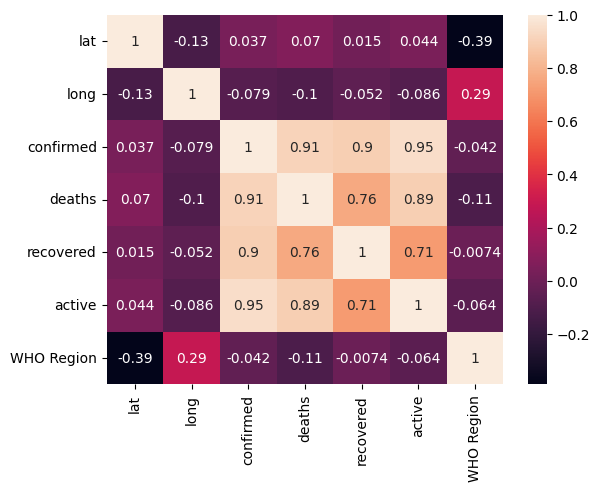

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#to find all the cases on last value in date
top = df[df["date"] == df["date"].max()]

In [ ]:
top

,state,country,lat,long,date,confirmed,deaths,recovered,active,WHO Region
48807,Alberta,Afghanistan,33.939110,67.709953,2020-07-27,36263,1269,25198,9796,3.0
48808,Alberta,Albania,41.153300,20.168300,2020-07-27,4880,144,2745,1991,1.0
48809,Alberta,Algeria,28.033900,1.659600,2020-07-27,27973,1163,18837,7973,2.0
48810,Alberta,Andorra,42.506300,1.521800,2020-07-27,907,52,803,52,1.0
48811,Alberta,Angola,-11.202700,17.873900,2020-07-27,950,41,242,667,2.0
...,...,...,...,...,...,...,...,...,...,...
49063,Alberta,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,2.0
49064,Alberta,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,3.0
49065,Alberta,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,2.0
49066,Alberta,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,1.0


In [ ]:
w = top.groupby("country")["confirmed","active","deaths"].sum().reset_index()

<ipython-input-24-d642e0d7fe05>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  w = top.groupby("country")["confirmed","active","deaths"].sum().reset_index()


In [ ]:
w

,country,confirmed,active,deaths
0,Afghanistan,36263,9796,1269
1,Albania,4880,1991,144
2,Algeria,27973,7973,1163
3,Andorra,907,52,52
4,Angola,950,667,41
...,...,...,...,...
182,West Bank and Gaza,10621,6791,78
183,Western Sahara,10,1,1
184,Yemen,1691,375,483
185,Zambia,4552,1597,140


In [ ]:
fig=px.choropleth(w,locations='country',locationmode='country names',color='active',hover_name='country',
                 range_color=[1,1500],color_continuous_scale="Peach",title='Active cases Countries')
fig.show()

In [ ]:
df.shape

(49068, 10)

In [ ]:
t_actives = top.groupby(by="country")["active"].sum().sort_values(ascending=False).head(20).reset_index()

In [ ]:
t_actives

,country,active
0,US,2816444
1,Brazil,508116
2,India,495499
3,United Kingdom,254427
4,Russia,201097
5,South Africa,170537
6,Colombia,117163
7,France,108928
8,Canada,107514
9,Peru,98752


Text(0, 0.5, 'Countries')

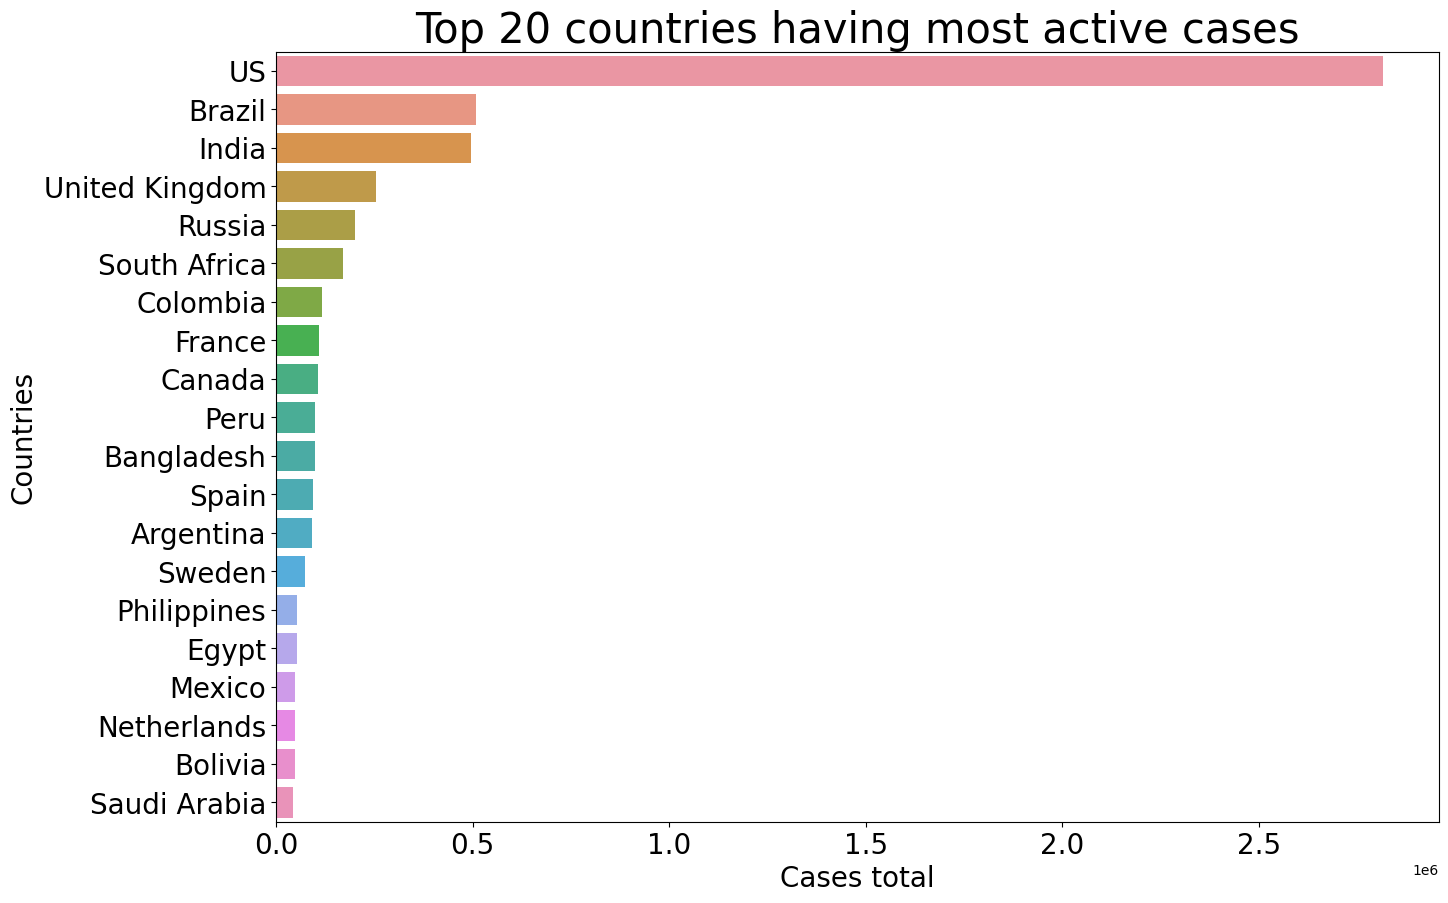

In [ ]:
plt.figure(figsize=(15,10))
plt.title('Top 20 countries having most active cases',fontsize=30)
a=sns.barplot(x=t_actives.active,y=t_actives.country)

a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countries',fontsize=20)

In [ ]:
t_deaths = top.groupby(by="country")["deaths"].sum().sort_values(ascending=False).head(20).reset_index()

In [ ]:
t_deaths

,country,deaths
0,US,148011
1,Brazil,87618
2,United Kingdom,45844
3,Mexico,44022
4,Italy,35112
5,India,33408
6,France,30212
7,Spain,28432
8,Peru,18418
9,Iran,15912


Text(0, 0.5, 'Country')

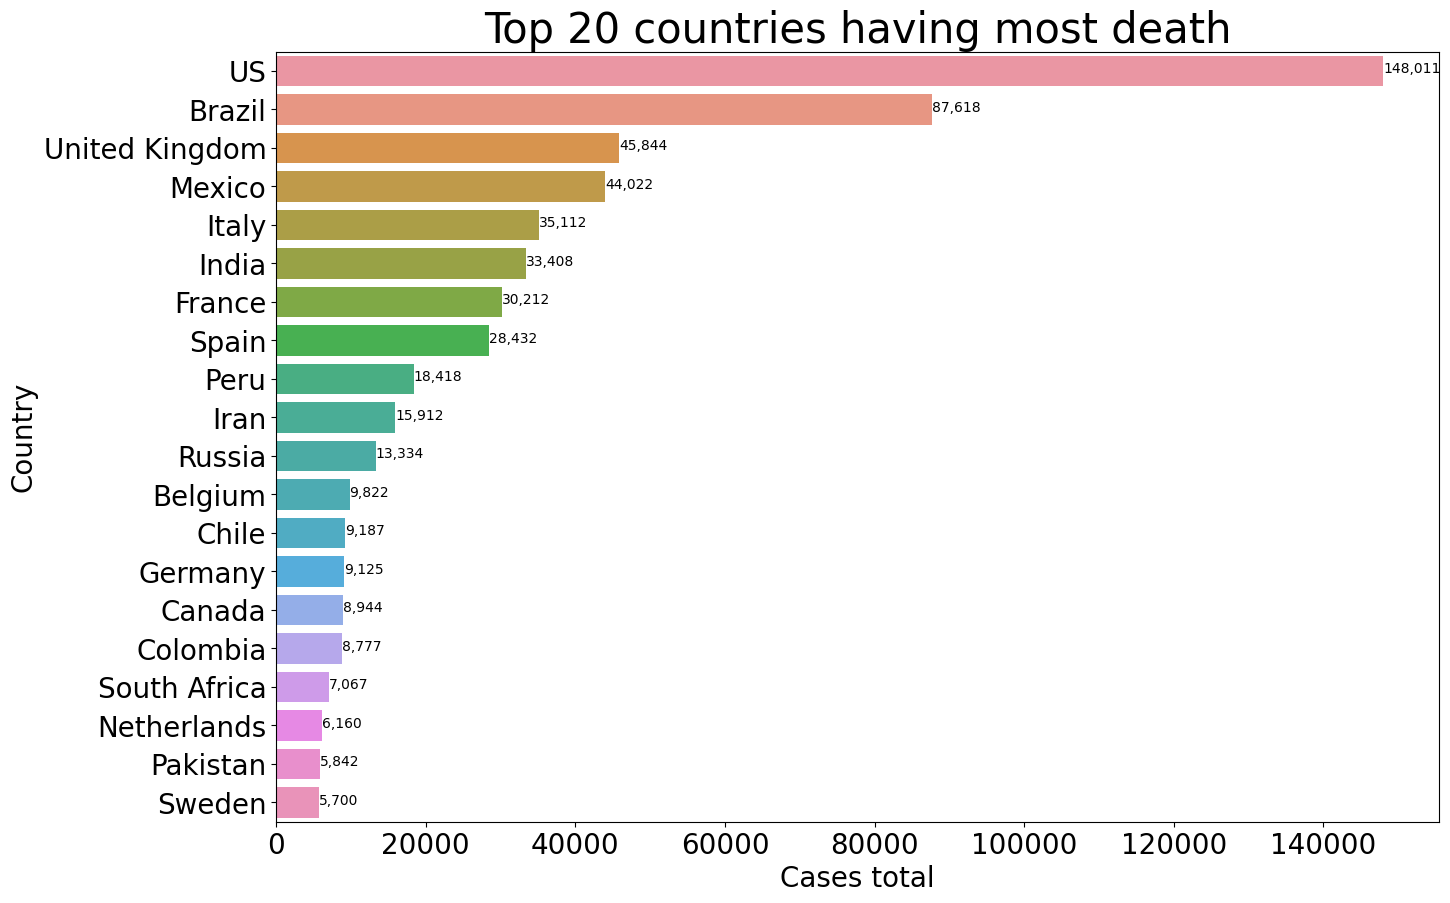

In [ ]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most death',fontsize=30)
a=sns.barplot(x=t_deaths.deaths,y=t_deaths.country)
for i,(value,name) in enumerate(zip(t_deaths.deaths,t_deaths.country)):
    a.text(value,i-.05,f'{value:,.0f}',size=10,ha='left',va='center')
a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Country',fontsize=20)

In [ ]:
recover= top.groupby(by="country")["recovered"].sum().sort_values(ascending=False).head(20).reset_index()

In [ ]:
recover

,country,recovered
0,Brazil,1846641
1,US,1325804
2,India,951166
3,Russia,602249
4,Chile,319954
5,Mexico,303810
6,South Africa,274925
7,Peru,272547
8,Iran,255144
9,Pakistan,241026


Text(0, 0.5, 'Countries')

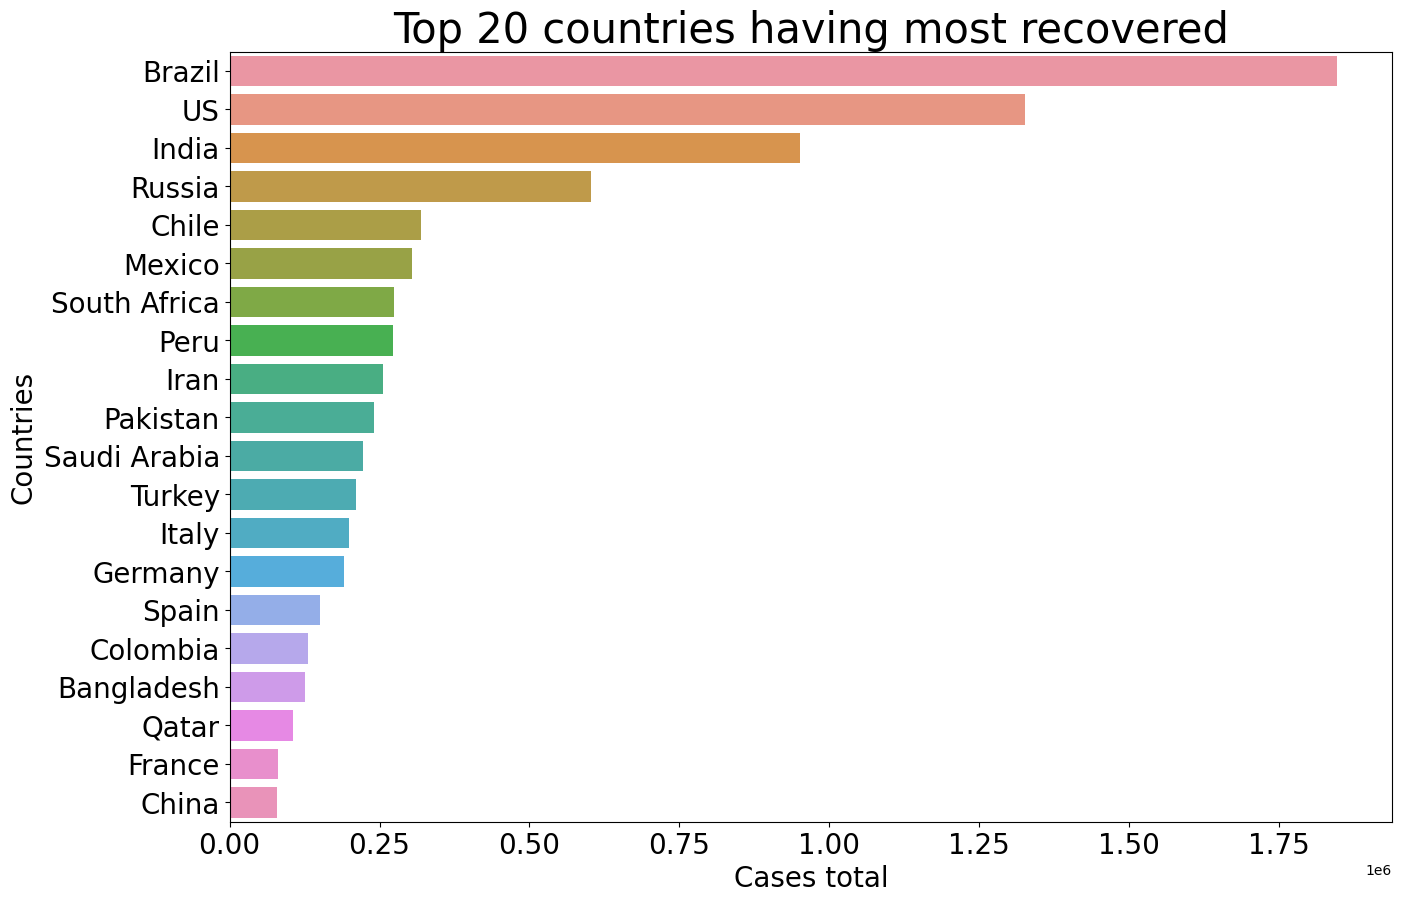

In [ ]:
plt.figure(figsize=(15,10))

plt.title('Top 20 countries having most recovered',fontsize=30)
a=sns.barplot(x=recover.recovered,y=recover.country)


a.set(xlabel='Cases total',ylabel='Country')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('Cases total',fontsize=20)
plt.ylabel('Countries',fontsize=20)

In [ ]:
Brazil = df[df.country=="Brazil"]
Brazil = Brazil.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

<ipython-input-36-1006a04e2721>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
Brazil

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,1620313,84082,2287475,583080
184,2020-07-24,1693214,85238,2343366,564914
185,2020-07-25,1785359,86449,2394513,522705
186,2020-07-26,1812913,87004,2419091,519174


In [ ]:
US = df[df.country=="US"]
US = US.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()


<ipython-input-38-c11f8b3e2afa>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
US

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,1,1
1,2020-01-23,0,0,1,1
2,2020-01-24,0,0,2,2
3,2020-01-25,0,0,2,2
4,2020-01-26,0,0,5,5
...,...,...,...,...,...
183,2020-07-23,1233269,144430,4038816,2661117
184,2020-07-24,1261624,145560,4112531,2705347
185,2020-07-25,1279414,146465,4178970,2753091
186,2020-07-26,1297863,146935,4233923,2789125


In [ ]:
Russia= df[df.country=="Russia"]
Russia = Russia.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()


<ipython-input-40-27cec31055c3>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
Russia

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,579295,12873,793720,201552
184,2020-07-24,587728,13026,799499,198745
185,2020-07-25,596064,13172,805332,196096
186,2020-07-26,599172,13249,811073,198652


In [ ]:
India= df[df.country=="India"]
India = India.groupby(by="date")["recovered","deaths","confirmed","active"].sum().reset_index()

<ipython-input-42-a1c1e8ad72fc>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
India

,date,recovered,deaths,confirmed,active
0,2020-01-22,0,0,0,0
1,2020-01-23,0,0,0,0
2,2020-01-24,0,0,0,0
3,2020-01-25,0,0,0,0
4,2020-01-26,0,0,0,0
...,...,...,...,...,...
183,2020-07-23,817209,30601,1288108,440298
184,2020-07-24,849432,31358,1337024,456234
185,2020-07-25,885573,32060,1385635,468002
186,2020-07-26,917568,32771,1435616,485277


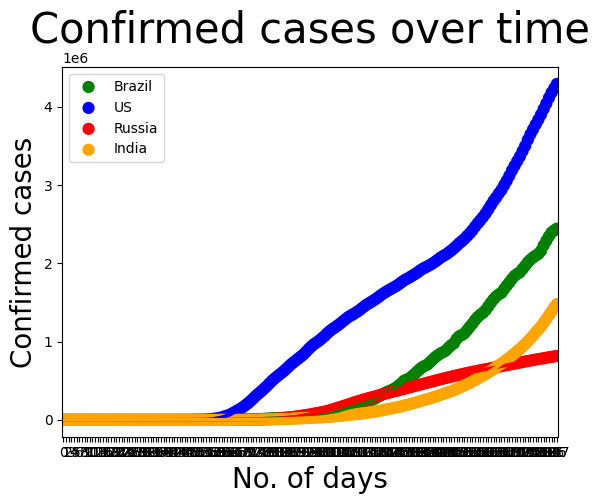

In [ ]:
sns.pointplot(data=Brazil, x=Brazil.index, y='confirmed', color="Green", label="Brazil")
sns.pointplot(data=US, x=US.index, y='confirmed', color="Blue", label="US")
sns.pointplot(data=Russia, x=Russia.index, y='confirmed', color="Red", label="Russia")
sns.pointplot(data=India, x=India.index, y='confirmed', color="Orange", label="India")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Confirmed cases', fontsize=20)
plt.title('Confirmed cases over time', fontsize=30)

# Adding a legend to distinguish the countries
plt.legend()

plt.show()

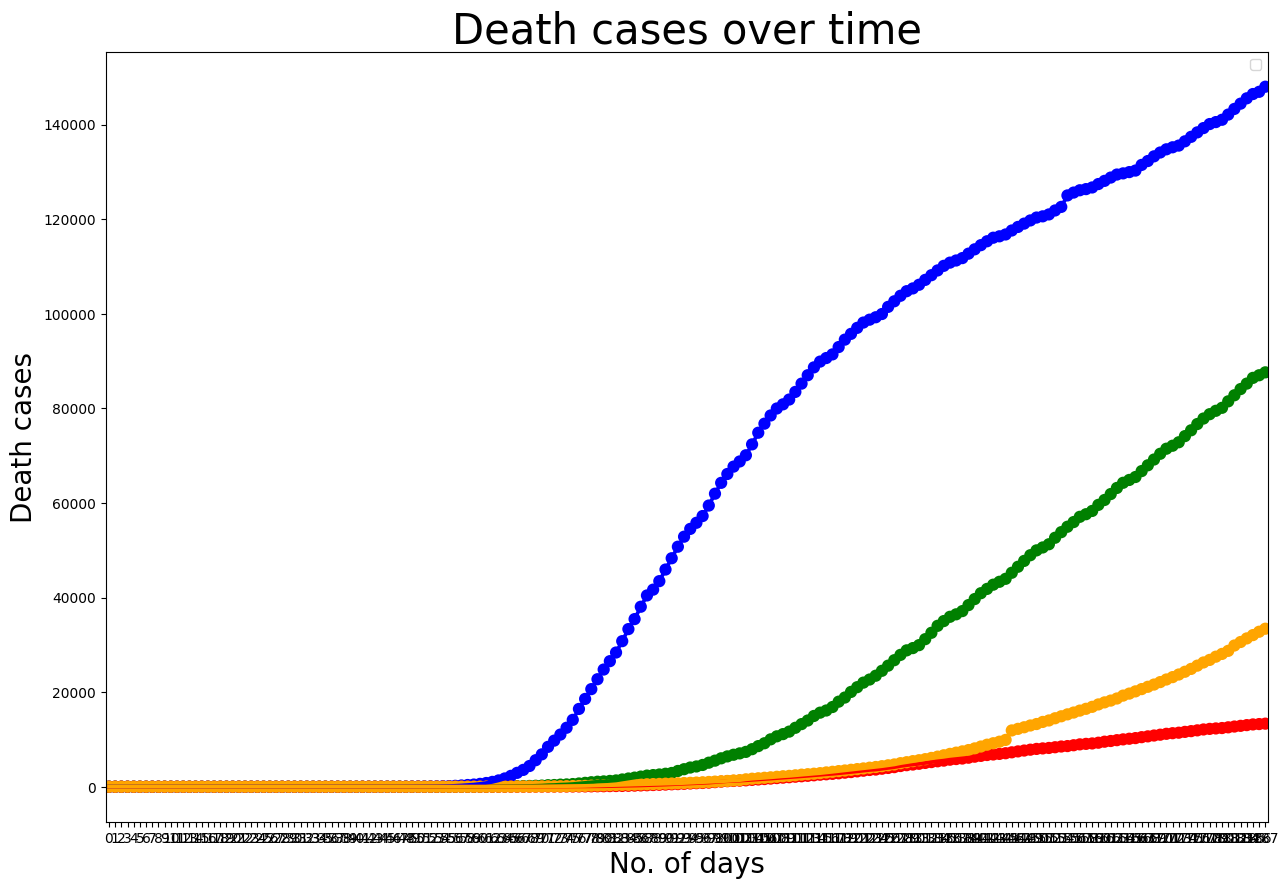

In [ ]:
plt.figure(figsize=(15, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.deaths, color="Green")
sns.pointplot(x=US.index, y=US.deaths, color="Blue")
sns.pointplot(x=Russia.index, y=Russia.deaths, color="Red")
sns.pointplot(x=India.index, y=India.deaths, color="Orange")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Death cases', fontsize=20)
plt.title('Death cases over time', fontsize=30)
# Adding a legend to distinguish the countries
plt.legend()
plt.show()

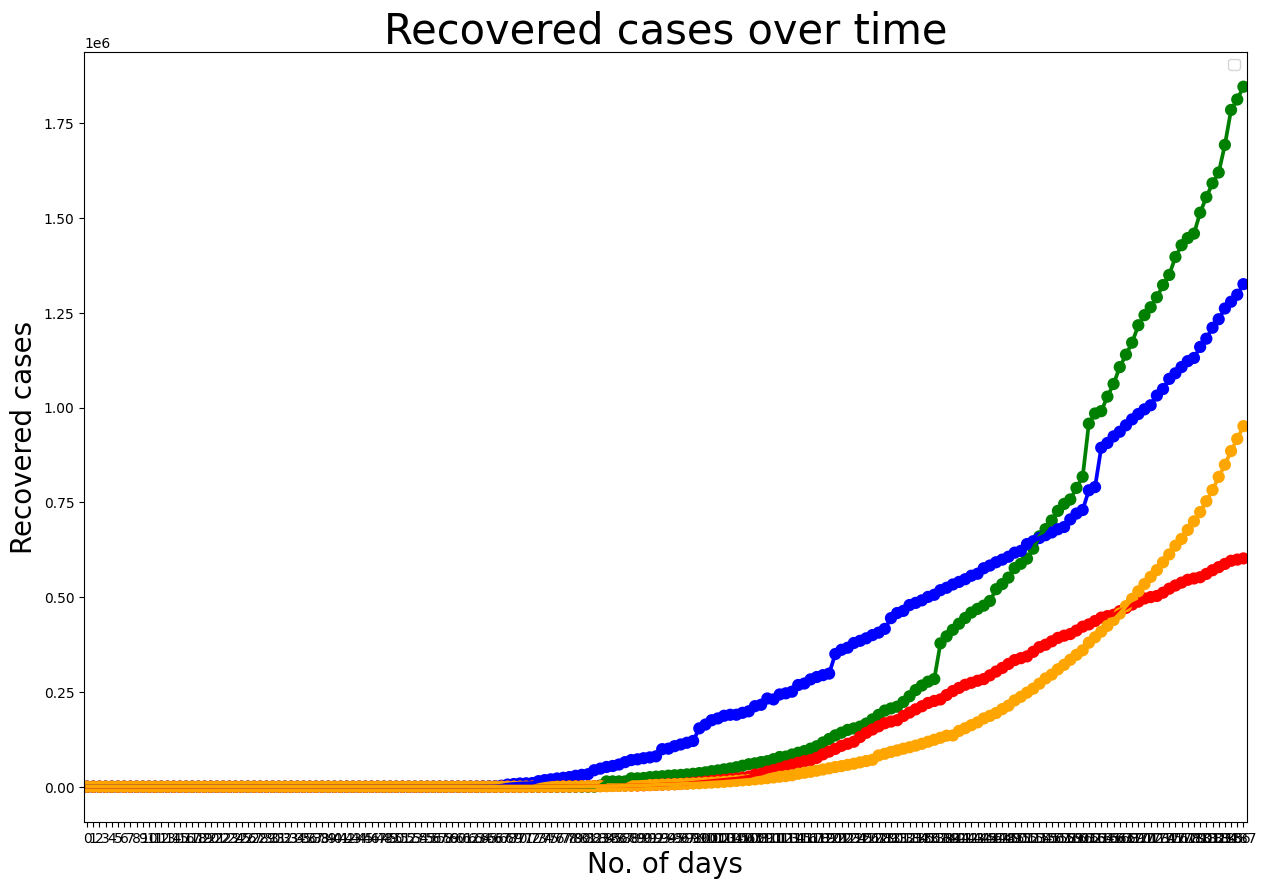

In [ ]:
plt.figure(figsize=(15, 10))

# Plotting the data for each country
sns.pointplot(x=Brazil.index, y=Brazil.recovered, color="Green")
sns.pointplot(x=US.index, y=US.recovered, color="Blue")
sns.pointplot(x=Russia.index, y=Russia.recovered, color="Red")
sns.pointplot(x=India.index, y=India.recovered, color="Orange")

plt.xlabel('No. of days', fontsize=20)
plt.ylabel('Recovered cases', fontsize=20)
plt.title('Recovered cases over time', fontsize=30)
# Adding a legend to distinguish the countries
plt.legend()
plt.show()

Text(0, 0.5, 'Cases total')

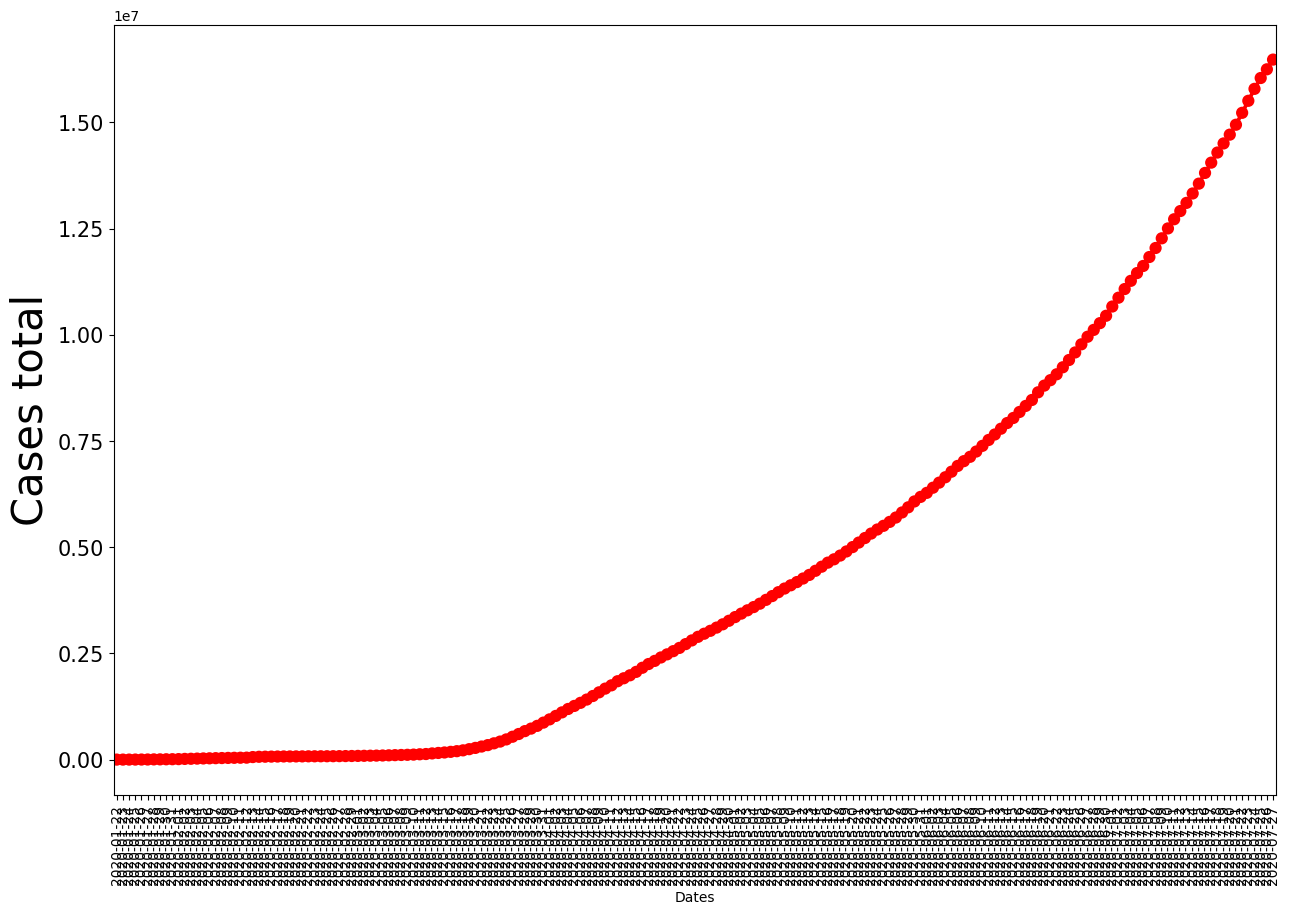

In [ ]:
plt.figure(figsize=(15,10))


t_cases=df.groupby('date')['confirmed'].sum().reset_index()
t_cases['date']=pd.to_datetime(t_cases['date'])

a=sns.pointplot(x=t_cases.date.dt.date,y=t_cases.confirmed,color='r')
a.set(xlabel='Dates',ylabel='Cases total')

plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=10)
plt.ylabel('Cases total',fontsize=30)

Forcasting using FB-prophet

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
df.groupby("date").sum().head()

<ipython-input-50-4048b8604fbd>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,lat,long,confirmed,deaths,recovered,active,WHO Region
date,,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510,242.0
2020-01-23,5594.20365,6140.869714,654,18,30,606,242.0
2020-01-24,5594.20365,6140.869714,941,26,36,879,242.0
2020-01-25,5594.20365,6140.869714,1434,42,39,1353,242.0
2020-01-26,5594.20365,6140.869714,2118,56,52,2010,242.0


In [ ]:
Total_Active=df['active'].sum()
print('Total no of Active_State',Total_Active)

Total no of Active_State 396715350


In [ ]:
confirmed = df.groupby("date").sum()["confirmed"].reset_index()

death = df.groupby("date").sum()["deaths"].reset_index()

recovered = df.groupby("date").sum()["recovered"].reset_index()

<ipython-input-52-6d505571f41f>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-52-6d505571f41f>:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-52-6d505571f41f>:5: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
confirmed

,date,confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


In [ ]:
death

,date,deaths
0,2020-01-22,17
1,2020-01-23,18
2,2020-01-24,26
3,2020-01-25,42
4,2020-01-26,56
...,...,...
183,2020-07-23,633506
184,2020-07-24,639650
185,2020-07-25,644517
186,2020-07-26,648621


In [ ]:
recovered

,date,recovered
0,2020-01-22,28
1,2020-01-23,30
2,2020-01-24,36
3,2020-01-25,39
4,2020-01-26,52
...,...,...
183,2020-07-23,8710969
184,2020-07-24,8939705
185,2020-07-25,9158743
186,2020-07-26,9293464


In [ ]:
confirmed2=df.groupby('date').sum()

<ipython-input-56-0ee3cc657f38>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [ ]:
confirmed2

,lat,long,confirmed,deaths,recovered,active,WHO Region
date,,,,,,,
2020-01-22,5594.20365,6140.869714,555,17,28,510,242.0
2020-01-23,5594.20365,6140.869714,654,18,30,606,242.0
2020-01-24,5594.20365,6140.869714,941,26,36,879,242.0
2020-01-25,5594.20365,6140.869714,1434,42,39,1353,242.0
2020-01-26,5594.20365,6140.869714,2118,56,52,2010,242.0
...,...,...,...,...,...,...,...
2020-07-23,5594.20365,6140.869714,15510481,633506,8710969,6166006,242.0
2020-07-24,5594.20365,6140.869714,15791645,639650,8939705,6212290,242.0
2020-07-25,5594.20365,6140.869714,16047190,644517,9158743,6243930,242.0


Forcasting on confirmed cases

In [ ]:
confirmed.columns = ["ds","y"]
confirmed["ds"] = pd.to_datetime(confirmed["ds"])
confirmed.tail()

,ds,y
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


In [ ]:
m = Prophet(interval_width = 0.95)
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpghqzp90r/g19gbd2c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpghqzp90r/9nnzkdgz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55000', 'data', 'file=/tmp/tmpghqzp90r/g19gbd2c.json', 'init=/tmp/tmpghqzp90r/9nnzkdgz.json', 'output', 'file=/tmp/tmpghqzp90r/prophet_model9epdou0x/prophet_model-20231112060841.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:08:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:08:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods = 7,freq="D")
future

,ds
0,2020-01-22
1,2020-01-23
2,2020-01-24
3,2020-01-25
4,2020-01-26
...,...
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02


In [ ]:
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,1.674391e+07,1.658467e+07,1.690693e+07
191,2020-07-31,1.695910e+07,1.679505e+07,1.712051e+07
192,2020-08-01,1.716676e+07,1.701595e+07,1.734433e+07
193,2020-08-02,1.736430e+07,1.719970e+07,1.753454e+07
194,2020-08-03,1.755889e+07,1.737820e+07,1.774911e+07


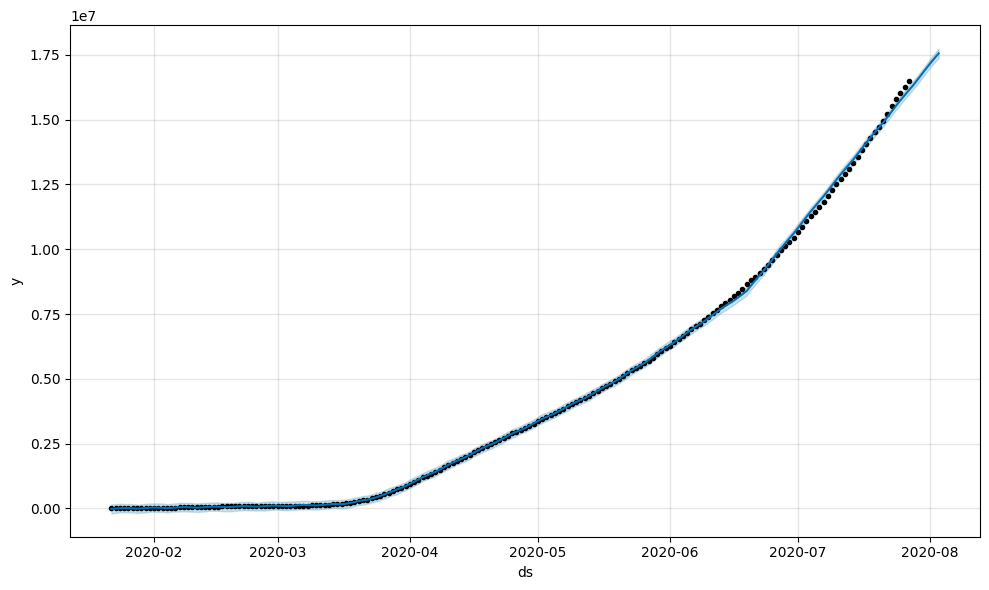

In [ ]:
confirmed_forecast_plot = m.plot(forecast)

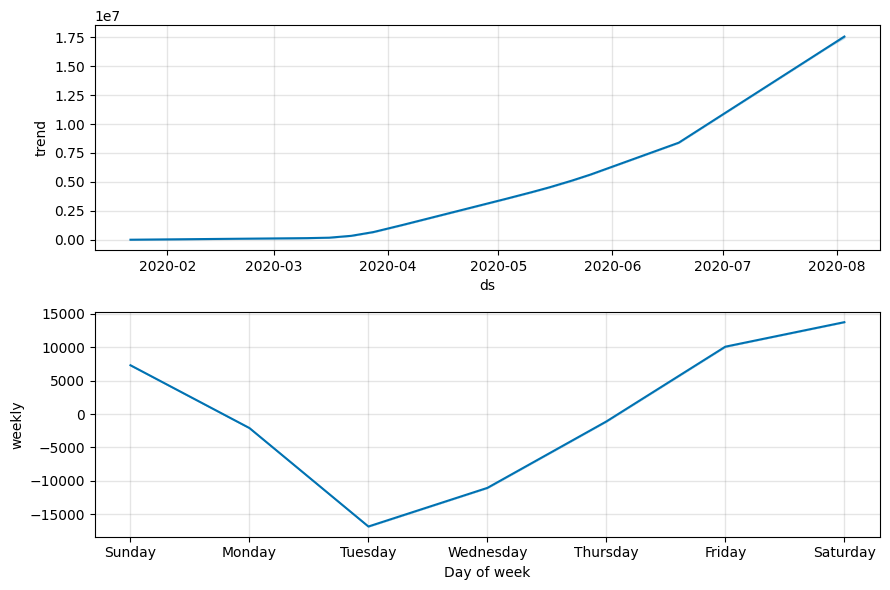

In [ ]:
confirmed_forecast_plot = m.plot_components(forecast)

Forcast on death caases

In [ ]:
death.columns = ["ds","y"]
death["ds"] = pd.to_datetime(death["ds"])

In [ ]:
m = Prophet()

In [ ]:
m.fit(death)
future = m.make_future_dataframe(periods = 7,freq="D")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpghqzp90r/lr7li74u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpghqzp90r/xy_hf5g1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16269', 'data', 'file=/tmp/tmpghqzp90r/lr7li74u.json', 'init=/tmp/tmpghqzp90r/xy_hf5g1.json', 'output', 'file=/tmp/tmpghqzp90r/prophet_modely_lq7fza/prophet_model-20231112061617.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:16:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:16:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future.tail()

,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = m.predict(future)
forecast[["ds","yhat","yhat_lower","yhat_upper"]]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-713.300051,-2778.377755,1190.395776
1,2020-01-23,-43.747057,-1987.255907,2019.930941
2,2020-01-24,531.538048,-1508.302944,2497.957227
3,2020-01-25,473.857138,-1585.040985,2295.526349
4,2020-01-26,-328.938355,-2267.427714,1477.399940
...,...,...,...,...
190,2020-07-30,663491.395651,661378.875569,665501.210059
191,2020-07-31,669006.394312,666847.901272,671365.079039
192,2020-08-01,673888.426957,671575.981691,676365.670736
193,2020-08-02,678025.345020,675354.979708,680659.963011


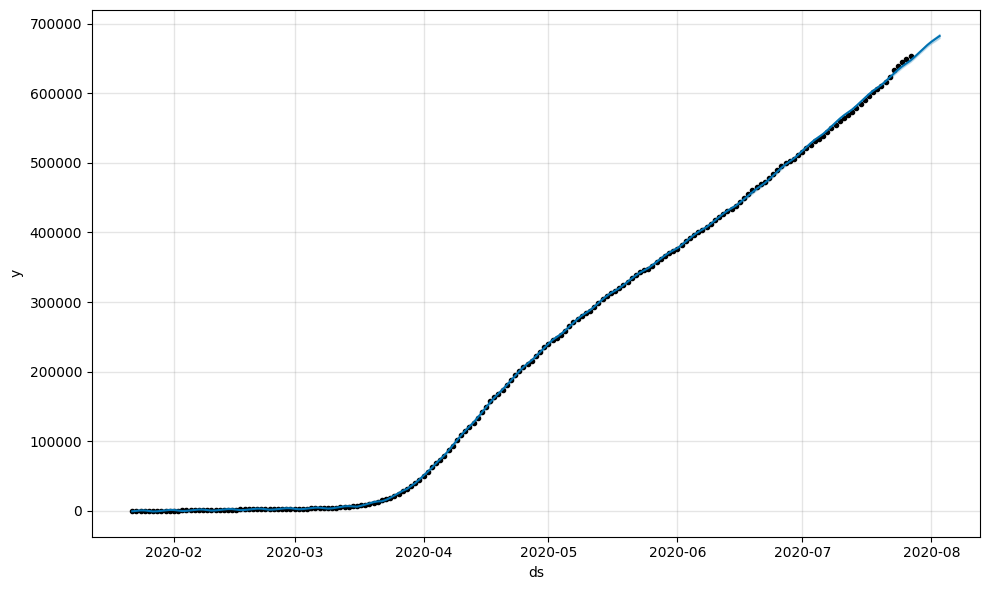

In [ ]:
death_forecast_plot = m.plot(forecast)

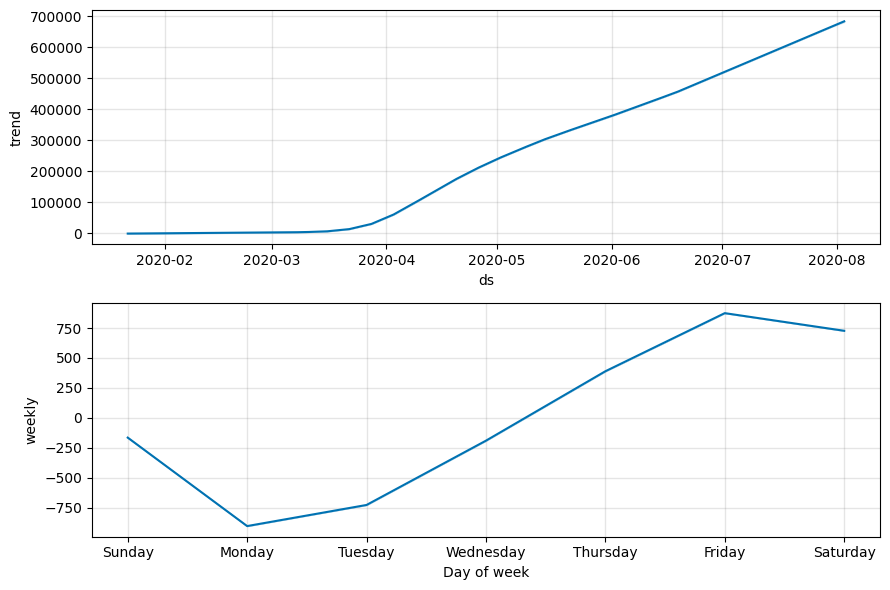

In [ ]:
deaths_forecast_plot = m.plot_components(forecast)

Forcast on Recovered cases

In [ ]:
recovered.columns = ["ds","y"]
recovered["ds"] = pd.to_datetime(recovered["ds"])

In [ ]:
m = Prophet()
m.fit(recovered)
future=m.make_future_dataframe(periods=7,freq='D')
future.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpghqzp90r/7cpl0hrm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpghqzp90r/4yfssvrd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90342', 'data', 'file=/tmp/tmpghqzp90r/7cpl0hrm.json', 'init=/tmp/tmpghqzp90r/4yfssvrd.json', 'output', 'file=/tmp/tmpghqzp90r/prophet_modelvx45nm8l/prophet_model-20231112062447.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:24:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:24:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
190,2020-07-30
191,2020-07-31
192,2020-08-01
193,2020-08-02
194,2020-08-03


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
190,2020-07-30,9.595783e+06,9.518658e+06,9.677737e+06
191,2020-07-31,9.737182e+06,9.658300e+06,9.821098e+06
192,2020-08-01,9.877343e+06,9.800986e+06,9.960983e+06
193,2020-08-02,1.000332e+07,9.921616e+06,1.008991e+07
194,2020-08-03,1.013982e+07,1.005240e+07,1.023053e+07


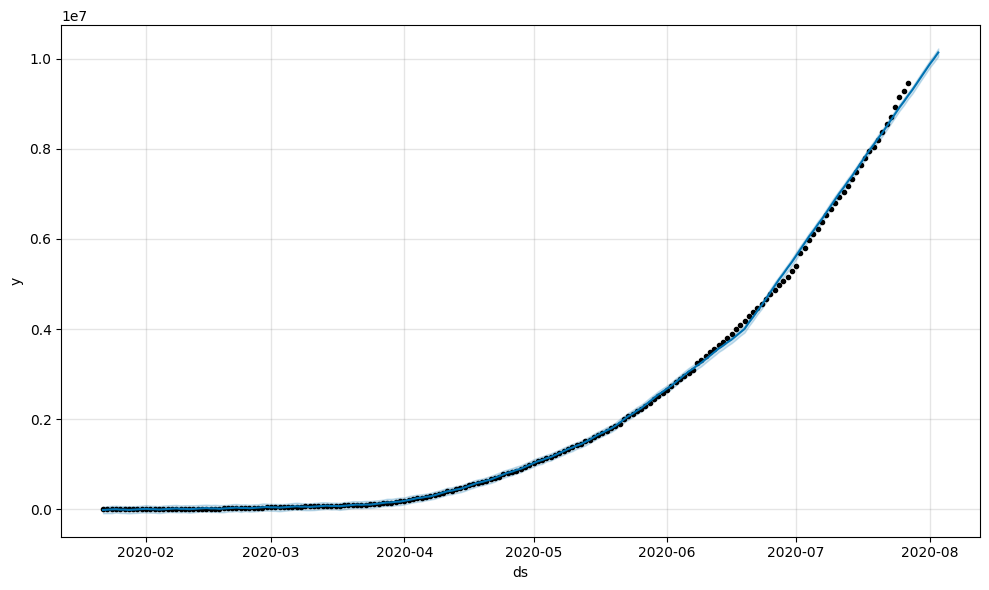

In [ ]:
recovered_forecast_plot = m.plot(forecast)

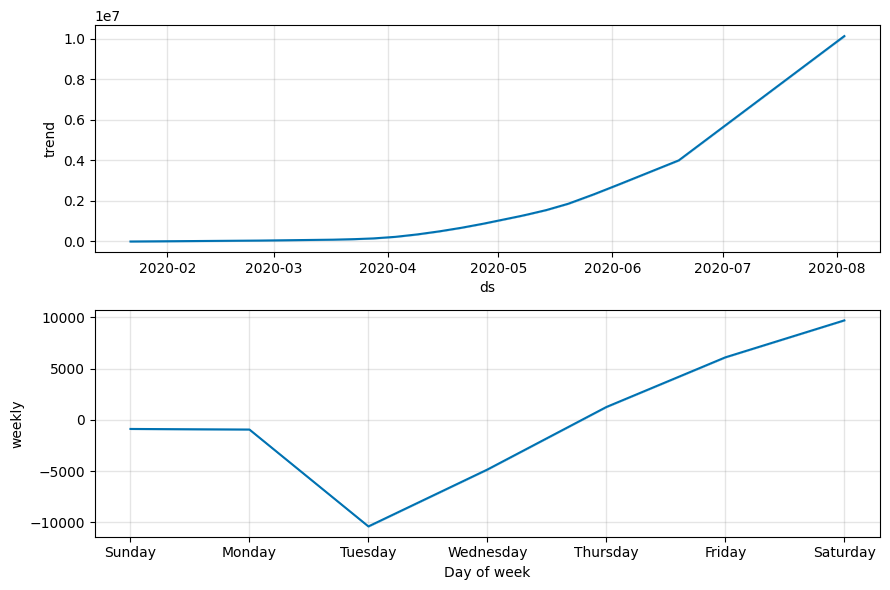

In [ ]:
recovered_forecast_plot = m.plot_components(forecast)